In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
TMK = " TMK"

# Import der Daten

In [26]:
df_gastro = pd.read_csv("Daten/cleaned_data/gastro_filtered.csv")
df_weather = pd.read_csv("Daten/cleaned_data/377_produkt_klima_tag.csv")


In [27]:
df_gastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3971 non-null   int64  
 1   Jahr                 3971 non-null   int64  
 2   Monatscode           3971 non-null   object 
 3   Monat                3971 non-null   object 
 4   Gastro_Id            3971 non-null   object 
 5   Gastro_Description   3971 non-null   object 
 6   Umsatz in millionen  3971 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 217.3+ KB


In [28]:
df_gastro

ID  Jahr Monatscode   Monat    Gastro_Id  \
0        0  1994    MONAT01  Januar      WZ08-55   
1        1  1994    MONAT01  Januar     WZ08-551   
2        2  1994    MONAT01  Januar     WZ08-552   
3        3  1994    MONAT01  Januar     WZ08-553   
4        4  1994    MONAT01  Januar     WZ08-559   
...    ...   ...        ...     ...          ...   
3966  3966  2024    MONAT01  Januar     WZ08-561   
3967  3967  2024    MONAT01  Januar     WZ08-562   
3968  3968  2024    MONAT01  Januar     WZ08-563   
3969  3969  2024    MONAT01  Januar  WZ08-561-01   
3970  3970  2024    MONAT01  Januar   WZ08-55-01   

                                     Gastro_Description  Umsatz in millionen  
0                                          Beherbergung                 92.3  
1                        Hotels, Gasthöfe und Pensionen                 91.9  
2     Ferienunterkünfte u. ähnliche Beherbergungsstä...                 97.3  
3                                         Campingplätze                 68.4  
4                         Sonstige Beherbergungsstätten                127.1  
...                                                 ...                  ...  
3966  Restaurants, Gaststätten, Imbissstuben, Cafes ...                 76.6  
3967  Caterer und sonstige Verpflegungsdienstleistungen                 87.4  
3968                            Ausschank von Getränken                 52.0  
3969                                 Gaststättengewerbe                 74.1  
3970                                        Gastgewerbe                 74.0  

[3971 rows x 7 columns]

In [29]:
df_weather

MESS_DATUM    FX    FM   RSK  RSKF   SDK  SHK_TAG    NM   VPM    PM  \
0      1947-01-01   NaN   NaN   0.0     0   2.0      6.0   6.3   5.9   NaN   
1      1947-01-02   NaN   NaN   0.1     7   0.0      3.0   7.7   5.6   NaN   
2      1947-01-03   NaN   NaN   0.0     0   0.0      3.0   6.0   6.0   NaN   
3      1947-01-04   NaN   NaN   0.0     0   4.7      2.0   3.7   3.7   NaN   
4      1947-01-05   NaN   NaN   0.0     0   6.6      1.0   0.0   2.0   NaN   
...           ...   ...   ...   ...   ...   ...      ...   ...   ...   ...   
27473  2023-12-27   NaN   NaN   0.0     0   NaN      0.0   NaN   8.3   NaN   
27474  2023-12-28   NaN   NaN   1.1     4   NaN      0.0   NaN   9.4   NaN   
27475  2023-12-29   NaN   NaN   0.1     4   NaN      0.0   NaN   9.2   NaN   
27476  2023-12-30   NaN   NaN   0.0     0   NaN      0.0   NaN   9.1   NaN   
27477  2023-12-31   NaN   NaN   2.1     4   NaN      0.0   NaN   8.1   NaN   

        TMK    UPM   TXK   TNK   TGK  
0       0.2  93.00   3.7  -3.9   NaN  
1       0.2  90.00   1.8  -3.5   NaN  
2       0.9  90.00   2.7  -1.0   NaN  
3      -4.7  81.00   1.5  -8.4   NaN  
4     -10.6  70.00  -4.5 -12.2   NaN  
...     ...    ...   ...   ...   ...  
27473   6.5  84.75   8.5   3.1   0.6  
27474   8.8  82.08  10.5   5.2   2.8  
27475  10.4  73.13  12.7   8.3   7.4  
27476   9.2  78.08  11.8   5.9   2.8  
27477   6.4  84.21  10.0   4.5   1.9  

[27478 rows x 15 columns]

In [30]:
# Beispiel der Daten für eine Gastro
selected_rows = df_gastro.loc[df_gastro['Gastro_Id'] == "WZ08-55", ["Gastro_Id", "Monat","Jahr"]]
selected_rows

Gastro_Id      Monat  Jahr
0      WZ08-55     Januar  1994
11     WZ08-55    Februar  1994
22     WZ08-55       März  1994
33     WZ08-55      April  1994
44     WZ08-55        Mai  1994
...        ...        ...   ...
3916   WZ08-55  September  2023
3927   WZ08-55    Oktober  2023
3938   WZ08-55   November  2023
3949   WZ08-55   Dezember  2023
3960   WZ08-55     Januar  2024

[361 rows x 3 columns]

In [31]:
df_weather[TMK].min()

-16.5

In [32]:
df_weather[TMK].max()

30.6

# Datum Verarbeitung


In [33]:
# Mess Datum split in Jahr und Monat
df_weather['Monat'] = pd.to_datetime(df_weather['MESS_DATUM']).dt.month
df_weather['Jahr'] = pd.to_datetime(df_weather['MESS_DATUM']).dt.year


In [34]:
df_avg_temp_month_year = df_weather.groupby(['Jahr', 'Monat'])[TMK].median().reset_index()

In [35]:
df_avg_temp_month_year

Jahr  Monat    TMK
0    1947      1  -2.50
1    1947      2  -3.70
2    1947      3   6.80
3    1947      4  11.75
4    1947      5  15.80
..    ...    ...    ...
898  2023      8  19.70
899  2023      9  19.90
900  2023     10  13.30
901  2023     11   7.70
902  2023     12   6.50

[903 rows x 3 columns]

In [36]:
month_mapping = {
    'Januar': 1,
    'Februar': 2,
    'März': 3,
    'April': 4,
    'Mai': 5,
    'Juni': 6,
    'Juli': 7,
    'August': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Dezember': 12
}

# String to Zahl für späteres Merge
df_gastro['Monat'] = df_gastro['Monat'].map(month_mapping)

In [37]:
#Beispiel zur veranschaulichung
selected_rows = df_gastro.loc[df_gastro['Gastro_Id'] == "WZ08-55", ["Gastro_Id", "Monat","Jahr",]]
selected_rows

Gastro_Id  Monat  Jahr
0      WZ08-55      1  1994
11     WZ08-55      2  1994
22     WZ08-55      3  1994
33     WZ08-55      4  1994
44     WZ08-55      5  1994
...        ...    ...   ...
3916   WZ08-55      9  2023
3927   WZ08-55     10  2023
3938   WZ08-55     11  2023
3949   WZ08-55     12  2023
3960   WZ08-55      1  2024

[361 rows x 3 columns]

# Merge auf Jahr und Monat

In [38]:
merged_df = pd.merge(df_gastro, df_avg_temp_month_year, on=['Monat', 'Jahr'])
merged_df

ID  Jahr Monatscode  Monat    Gastro_Id  \
0        0  1994    MONAT01      1      WZ08-55   
1        1  1994    MONAT01      1     WZ08-551   
2        2  1994    MONAT01      1     WZ08-552   
3        3  1994    MONAT01      1     WZ08-553   
4        4  1994    MONAT01      1     WZ08-559   
...    ...   ...        ...    ...          ...   
3724  3955  2023    MONAT12     12     WZ08-561   
3725  3956  2023    MONAT12     12     WZ08-562   
3726  3957  2023    MONAT12     12     WZ08-563   
3727  3958  2023    MONAT12     12  WZ08-561-01   
3728  3959  2023    MONAT12     12   WZ08-55-01   

                                     Gastro_Description  Umsatz in millionen  \
0                                          Beherbergung                 92.3   
1                        Hotels, Gasthöfe und Pensionen                 91.9   
2     Ferienunterkünfte u. ähnliche Beherbergungsstä...                 97.3   
3                                         Campingplätze                 68.4   
4                         Sonstige Beherbergungsstätten                127.1   
...                                                 ...                  ...   
3724  Restaurants, Gaststätten, Imbissstuben, Cafes ...                 94.3   
3725  Caterer und sonstige Verpflegungsdienstleistungen                 96.5   
3726                            Ausschank von Getränken                 70.1   
3727                                 Gaststättengewerbe                 91.9   
3728                                        Gastgewerbe                 90.7   

       TMK  
0      4.2  
1      4.2  
2      4.2  
3      4.2  
4      4.2  
...    ...  
3724   6.5  
3725   6.5  
3726   6.5  
3727   6.5  
3728   6.5  

[3729 rows x 8 columns]

In [39]:
# Beispiel einer Gastro
pd.set_option('display.max_rows', 60)
selected_rows = merged_df.loc[df_gastro['Gastro_Id'] == "WZ08-55", ["Gastro_Id", "Monat","Jahr",TMK]]
selected_rows

Gastro_Id  Monat  Jahr    TMK
0      WZ08-55      1  1994   4.20
11     WZ08-55      2  1994   3.05
22     WZ08-55      3  1994   8.60
33     WZ08-55      4  1994   8.00
44     WZ08-55      5  1994  14.10
...        ...    ...   ...    ...
3674   WZ08-55      8  2023  19.70
3685   WZ08-55      9  2023  19.90
3696   WZ08-55     10  2023  13.30
3707   WZ08-55     11  2023   7.70
3718   WZ08-55     12  2023   6.50

[339 rows x 4 columns]

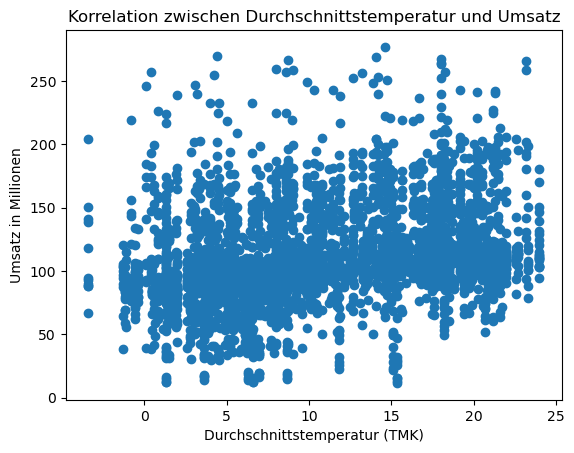

In [40]:
plt.scatter(merged_df[TMK], merged_df['Umsatz in millionen'])
plt.title('Korrelation zwischen Durchschnittstemperatur und Umsatz')
plt.xlabel('Durchschnittstemperatur (TMK)')
plt.ylabel('Umsatz in Millionen')
plt.show()

In [41]:
grouped = merged_df.groupby('Gastro_Id')
merged_df[merged_df['Gastro_Id'] == 'WZ08-55']

ID  Jahr Monatscode  Monat Gastro_Id Gastro_Description  \
0        0  1994    MONAT01      1   WZ08-55       Beherbergung   
11      11  1994    MONAT02      2   WZ08-55       Beherbergung   
22      22  1994    MONAT03      3   WZ08-55       Beherbergung   
33      33  1994    MONAT04      4   WZ08-55       Beherbergung   
44      44  1994    MONAT05      5   WZ08-55       Beherbergung   
...    ...   ...        ...    ...       ...                ...   
3674  3905  2023    MONAT08      8   WZ08-55       Beherbergung   
3685  3916  2023    MONAT09      9   WZ08-55       Beherbergung   
3696  3927  2023    MONAT10     10   WZ08-55       Beherbergung   
3707  3938  2023    MONAT11     11   WZ08-55       Beherbergung   
3718  3949  2023    MONAT12     12   WZ08-55       Beherbergung   

      Umsatz in millionen    TMK  
0                    92.3   4.20  
11                   97.0   3.05  
22                  111.3   8.60  
33                  117.2   8.00  
44                  138.0  14.10  
...                   ...    ...  
3674                111.7  19.70  
3685                123.4  19.90  
3696                111.2  13.30  
3707                 90.9   7.70  
3718                 90.5   6.50  

[339 rows x 8 columns]

In [42]:
# Drop von Monatscode und Gastro wird nicht benötigt
merged_df.drop(["Monatscode","Gastro_Description"], axis=1, inplace=True)
# Merge von Jahr und Monat in Jahr_Monat
merged_df["Jahr_Monat"] = merged_df["Jahr"].astype(str) + "-" + merged_df["Monat"].astype(str)

merged_df

ID  Jahr  Monat    Gastro_Id  Umsatz in millionen   TMK Jahr_Monat
0        0  1994      1      WZ08-55                 92.3   4.2     1994-1
1        1  1994      1     WZ08-551                 91.9   4.2     1994-1
2        2  1994      1     WZ08-552                 97.3   4.2     1994-1
3        3  1994      1     WZ08-553                 68.4   4.2     1994-1
4        4  1994      1     WZ08-559                127.1   4.2     1994-1
...    ...   ...    ...          ...                  ...   ...        ...
3724  3955  2023     12     WZ08-561                 94.3   6.5    2023-12
3725  3956  2023     12     WZ08-562                 96.5   6.5    2023-12
3726  3957  2023     12     WZ08-563                 70.1   6.5    2023-12
3727  3958  2023     12  WZ08-561-01                 91.9   6.5    2023-12
3728  3959  2023     12   WZ08-55-01                 90.7   6.5    2023-12

[3729 rows x 7 columns]

In [43]:
merged_df.to_csv("merged_df_UmsatzTemperatur.csv")

In [44]:
# Niedrigste Temperatur aus dem Durschnitt
min_value = merged_df[TMK].min()
min_value

-3.4

In [45]:
# # Höchste Temperatur aus dem Durschnitt
max_value = merged_df[TMK].max()
max_value

24.0

# Plot von Umsatz und Temperatur

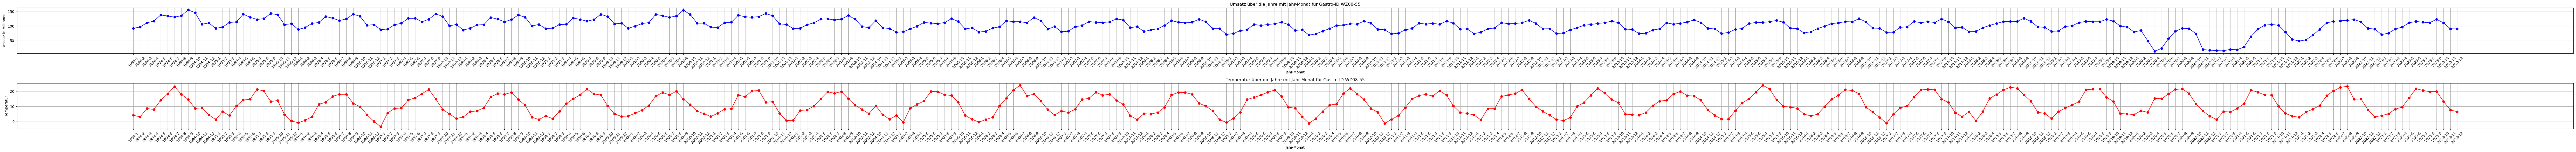

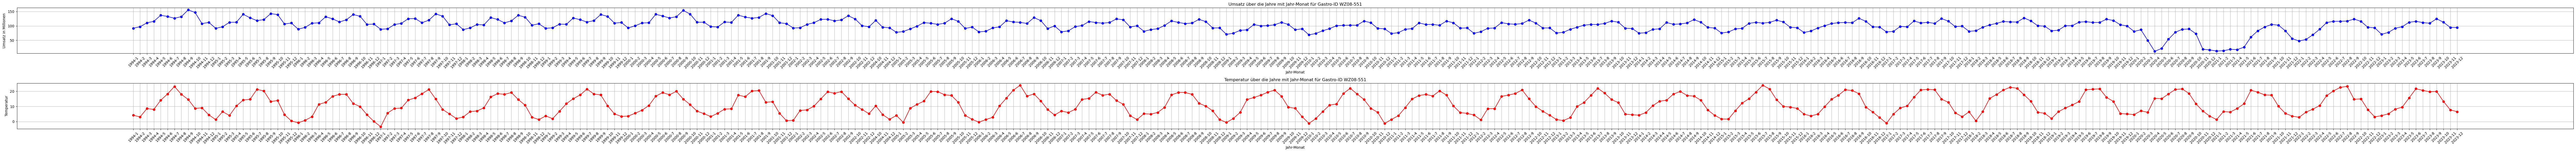

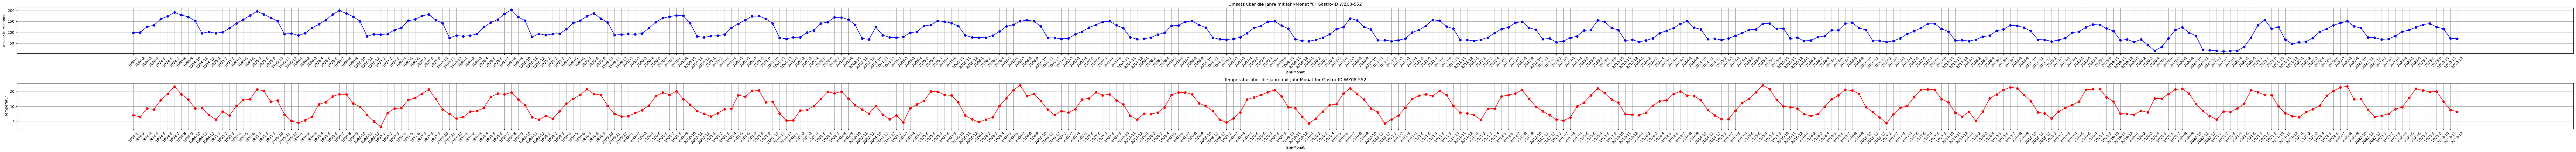

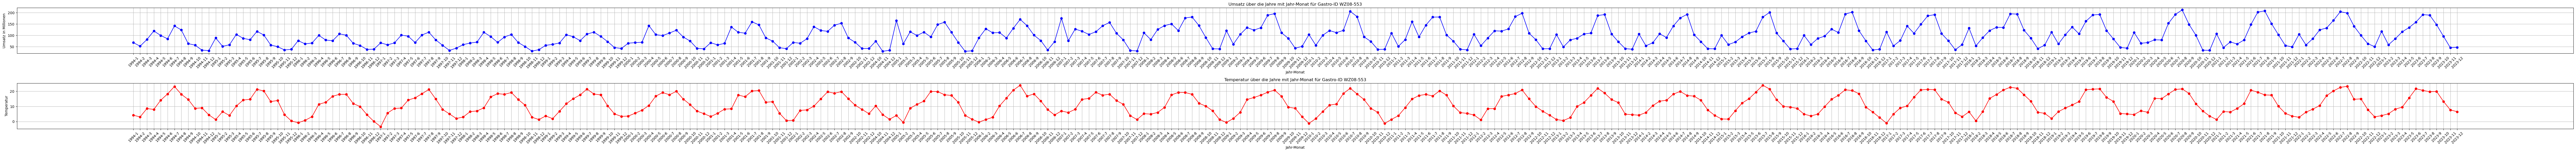

In [46]:
unique_gastro_ids = merged_df['Gastro_Id'].unique()

for gastro_id in unique_gastro_ids:
    selected_rows_gastro = merged_df[merged_df['Gastro_Id'] == gastro_id]
    
    plt.figure(figsize=(100, 6))  # Größe des Plots anpassen
    
    # Plot für den Umsatz
    plt.subplot(2, 1, 1)  # Erste von zwei Zeilen
    plt.plot(selected_rows_gastro['Jahr_Monat'], selected_rows_gastro['Umsatz in millionen'], marker='o', color='blue')
    plt.title(f'Umsatz über die Jahre mit Jahr-Monat für Gastro-ID {gastro_id}')
    plt.xlabel('Jahr-Monat')
    plt.ylabel('Umsatz in Millionen')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotation der x-Achsenbeschriftungen für bessere Lesbarkeit
    
    # Plot für die Temperatur
    plt.subplot(2, 1, 2)  # Zweite von zwei Zeilen
    plt.plot(selected_rows_gastro['Jahr_Monat'], selected_rows_gastro[TMK], marker='o', color='red')
    plt.title(f'Temperatur über die Jahre mit Jahr-Monat für Gastro-ID {gastro_id}')
    plt.xlabel('Jahr-Monat')
    plt.ylabel('Temperatur')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotation der x-Achsenbeschriftungen für bessere Lesbarkeit
    
    plt.tight_layout()  # Für einen verbesserten Layout-Abstand zwischen den Subplots
    
    plt.show()


# Korrelation zwischen Umsatz und Temperatur

In [ ]:
correlation = merged_df['Umsatz in millionen'].corr(merged_df[TMK])

print("Korrelationskoeffizient zwischen Temperatur und Jahresumsatz:", correlation)

Korrelationskoeffizient zwischen Temperatur und Jahresumsatz: 0.30096407979359235


In [ ]:
# Prüfen auf einen Zusammenhang mit zeitlicher Verzögerung
lags = range(1, 13)  # Mögliche Verzögerungen von 1 bis 12 Monaten
correlation_with_lags = []
for lag in lags:
    # Verzögerte Durchschnittstemperatur um `lag` Monate
    merged_df['TMK_delayed'] = merged_df[TMK].shift(periods=lag)
    # Berechnen der Korrelation zwischen verzögerter Durchschnittstemperatur und Umsatz
    correlation_with_lags.append(merged_df['Umsatz in millionen'].corr(merged_df['TMK_delayed']))

# Ermitteln des Lags mit der höchsten Korrelation
max_correlation_index = np.argmax(correlation_with_lags)
lag_with_max_correlation = lags[max_correlation_index]
max_correlation = correlation_with_lags[max_correlation_index]

print("Maximale Korrelation mit Lag von", lag_with_max_correlation, "Monaten:", max_correlation)

Maximale Korrelation mit Lag von 2 Monaten: 0.30600223670562887


## Neue Datenquelle Dax

In [ ]:
merged_df

ID  Jahr  Monat    Gastro_Id  Umsatz in millionen   TMK Jahr_Monat  \
0        0  1994      1      WZ08-55                 92.3   4.2     1994-1   
1        1  1994      1     WZ08-551                 91.9   4.2     1994-1   
2        2  1994      1     WZ08-552                 97.3   4.2     1994-1   
3        3  1994      1     WZ08-553                 68.4   4.2     1994-1   
4        4  1994      1     WZ08-559                127.1   4.2     1994-1   
...    ...   ...    ...          ...                  ...   ...        ...   
3724  3955  2023     12     WZ08-561                 94.3   6.5    2023-12   
3725  3956  2023     12     WZ08-562                 96.5   6.5    2023-12   
3726  3957  2023     12     WZ08-563                 70.1   6.5    2023-12   
3727  3958  2023     12  WZ08-561-01                 91.9   6.5    2023-12   
3728  3959  2023     12   WZ08-55-01                 90.7   6.5    2023-12   

      TMK_delayed  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
3724          7.7  
3725          7.7  
3726          7.7  
3727          7.7  
3728          7.7  

[3729 rows x 8 columns]

Max/Min Datum von merged_df

In [ ]:
min = merged_df["Jahr_Monat"].min()
min

'1994-1'

In [ ]:
max = merged_df["Jahr_Monat"].max()
max

'2023-9'

Dax import

In [ ]:
df_dax = pd.read_csv("DAXHISTORIE.csv")
df_dax

Date          Open          High           Low         Close  \
0     1987-12-30   1005.190002   1005.190002   1005.190002   1005.190002   
1     1987-12-31           NaN           NaN           NaN           NaN   
2     1988-01-01           NaN           NaN           NaN           NaN   
3     1988-01-04    956.489990    956.489990    956.489990    956.489990   
4     1988-01-05    996.099976    996.099976    996.099976    996.099976   
...          ...           ...           ...           ...           ...   
9372  2024-05-28  18775.550781  18855.050781  18635.039063  18677.869141   
9373  2024-05-29  18677.699219  18677.699219  18438.009766  18473.289063   
9374  2024-05-30  18465.470703  18531.849609  18394.429688  18496.789063   
9375  2024-05-31  18495.220703  18542.269531  18426.720703  18497.939453   
9376  2024-06-03  18503.789063  18689.220703  18503.789063  18633.939453   

         Adj Close       Volume  
0      1005.190002          0.0  
1              NaN          NaN  
2              NaN          NaN  
3       956.489990          0.0  
4       996.099976          0.0  
...            ...          ...  
9372  18677.869141   52670400.0  
9373  18473.289063   59553600.0  
9374  18496.789063   52348300.0  
9375  18497.939453  144013800.0  
9376  18633.939453          0.0  

[9377 rows x 7 columns]

Proccessing

In [ ]:
df_dax =df_dax.drop(columns=["High","Low","Adj Close","Volume"])

In [ ]:
df_dax['Date'] = pd.to_datetime(df_dax['Date'])

# Jahr und Monat extrahieren und als neue Spalte hinzufügen
df_dax['YearMonth'] = df_dax['Date'].dt.to_period('M')

# Gruppieren nach Jahr und Monat und aggregieren
aggregated_dax = df_dax.groupby('YearMonth').agg({
    'Open': 'first',
    'Close': 'last',
}).reset_index()

# Umbenennen der 'YearMonth' Spalte in 'Date' für Konsistenz
aggregated_dax['YearMonth'] = aggregated_dax['YearMonth'].astype(str)  # Umwandlung in String-Format 'YYYY-MM'
aggregated_dax.rename(columns={'YearMonth': 'Date'}, inplace=True)
aggregated_dax

Date          Open         Close
0    1987-12   1005.190002   1005.190002
1    1988-01    956.489990    936.000000
2    1988-02    951.500000   1083.339966
3    1988-03   1087.319946   1062.329956
4    1988-04   1063.280029   1049.170044
..       ...           ...           ...
434  2024-02  16834.130859  17678.189453
435  2024-03  17793.470703  18492.490234
436  2024-04  18492.359375  17932.169922
437  2024-05  17935.779297  18497.939453
438  2024-06  18503.789063  18633.939453

[439 rows x 3 columns]

In [ ]:
filtered_dax = aggregated_dax[(aggregated_dax['Date'] >= min) & (aggregated_dax['Date'] <= max)]
filtered_dax=filtered_dax.dropna()
filtered_dax

Date          Open         Close
82   1994-10   1995.800049   2061.580078
83   1994-11   2052.219971   2057.280029
84   1994-12   2054.159912   2097.510010
85   1995-01   2091.469971   2024.819946
86   1995-02   2028.699951   2097.850098
..       ...           ...           ...
428  2023-08  16414.789063  15947.080078
429  2023-09  15936.339844  15386.580078
430  2023-10  15439.959961  14810.339844
431  2023-11  14851.959961  16215.429688
432  2023-12  16296.919922  16751.640625

[351 rows x 3 columns]

Mergen von gastro und dax

In [ ]:
merged_df_dax_gastro = pd.merge(merged_df, filtered_dax, how='left', left_on='Jahr_Monat', right_on='Date')
merged_df_dax_gastro

ID  Jahr  Monat    Gastro_Id  Umsatz in millionen   TMK Jahr_Monat  \
0        0  1994      1      WZ08-55                 92.3   4.2     1994-1   
1        1  1994      1     WZ08-551                 91.9   4.2     1994-1   
2        2  1994      1     WZ08-552                 97.3   4.2     1994-1   
3        3  1994      1     WZ08-553                 68.4   4.2     1994-1   
4        4  1994      1     WZ08-559                127.1   4.2     1994-1   
...    ...   ...    ...          ...                  ...   ...        ...   
3724  3955  2023     12     WZ08-561                 94.3   6.5    2023-12   
3725  3956  2023     12     WZ08-562                 96.5   6.5    2023-12   
3726  3957  2023     12     WZ08-563                 70.1   6.5    2023-12   
3727  3958  2023     12  WZ08-561-01                 91.9   6.5    2023-12   
3728  3959  2023     12   WZ08-55-01                 90.7   6.5    2023-12   

      TMK_delayed     Date          Open         Close  
0             NaN      NaN           NaN           NaN  
1             NaN      NaN           NaN           NaN  
2             NaN      NaN           NaN           NaN  
3             NaN      NaN           NaN           NaN  
4             NaN      NaN           NaN           NaN  
...           ...      ...           ...           ...  
3724          7.7  2023-12  16296.919922  16751.640625  
3725          7.7  2023-12  16296.919922  16751.640625  
3726          7.7  2023-12  16296.919922  16751.640625  
3727          7.7  2023-12  16296.919922  16751.640625  
3728          7.7  2023-12  16296.919922  16751.640625  

[3729 rows x 11 columns]

In [ ]:
merged_df_dax_gastro=merged_df_dax_gastro.dropna()
merged_df_dax_gastro

ID  Jahr  Monat    Gastro_Id  Umsatz in millionen   TMK Jahr_Monat  \
99      99  1994     10      WZ08-55                146.0   8.7    1994-10   
100    100  1994     10     WZ08-551                146.6   8.7    1994-10   
101    101  1994     10     WZ08-552                152.8   8.7    1994-10   
102    102  1994     10     WZ08-553                 56.7   8.7    1994-10   
103    103  1994     10     WZ08-559                187.8   8.7    1994-10   
...    ...   ...    ...          ...                  ...   ...        ...   
3724  3955  2023     12     WZ08-561                 94.3   6.5    2023-12   
3725  3956  2023     12     WZ08-562                 96.5   6.5    2023-12   
3726  3957  2023     12     WZ08-563                 70.1   6.5    2023-12   
3727  3958  2023     12  WZ08-561-01                 91.9   6.5    2023-12   
3728  3959  2023     12   WZ08-55-01                 90.7   6.5    2023-12   

      TMK_delayed     Date          Open         Close  
99           18.0  1994-10   1995.800049   2061.580078  
100          14.6  1994-10   1995.800049   2061.580078  
101          14.6  1994-10   1995.800049   2061.580078  
102          14.6  1994-10   1995.800049   2061.580078  
103          14.6  1994-10   1995.800049   2061.580078  
...           ...      ...           ...           ...  
3724          7.7  2023-12  16296.919922  16751.640625  
3725          7.7  2023-12  16296.919922  16751.640625  
3726          7.7  2023-12  16296.919922  16751.640625  
3727          7.7  2023-12  16296.919922  16751.640625  
3728          7.7  2023-12  16296.919922  16751.640625  

[957 rows x 11 columns]

Ploten des Umsatz der gastro vs Dax

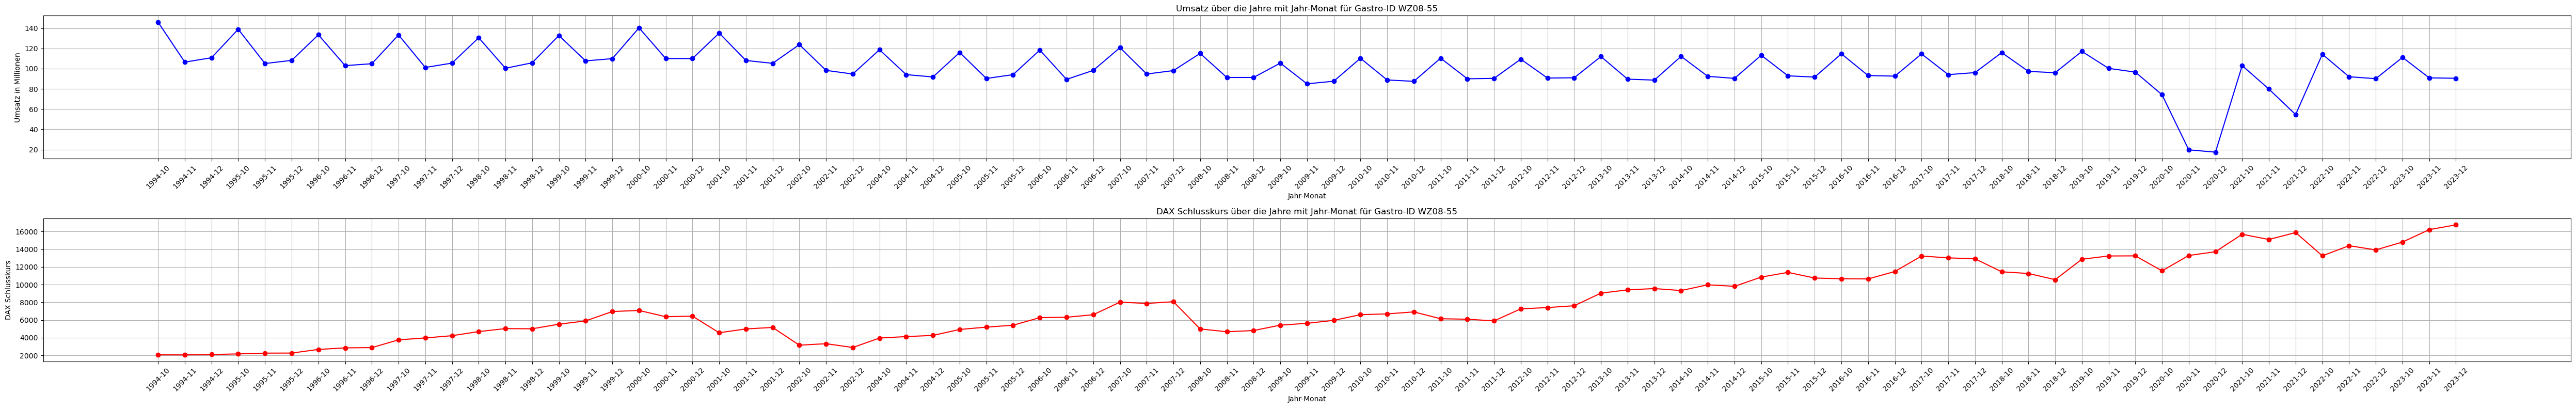

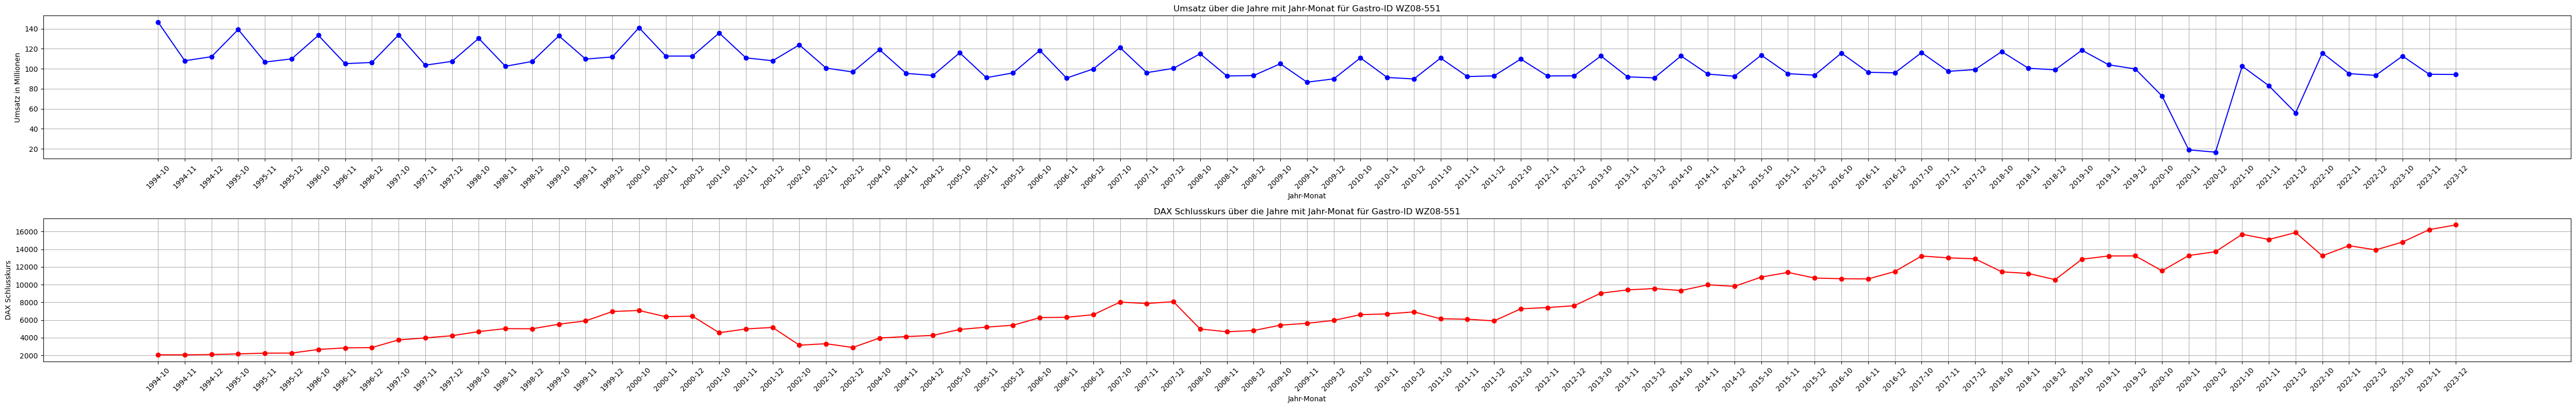

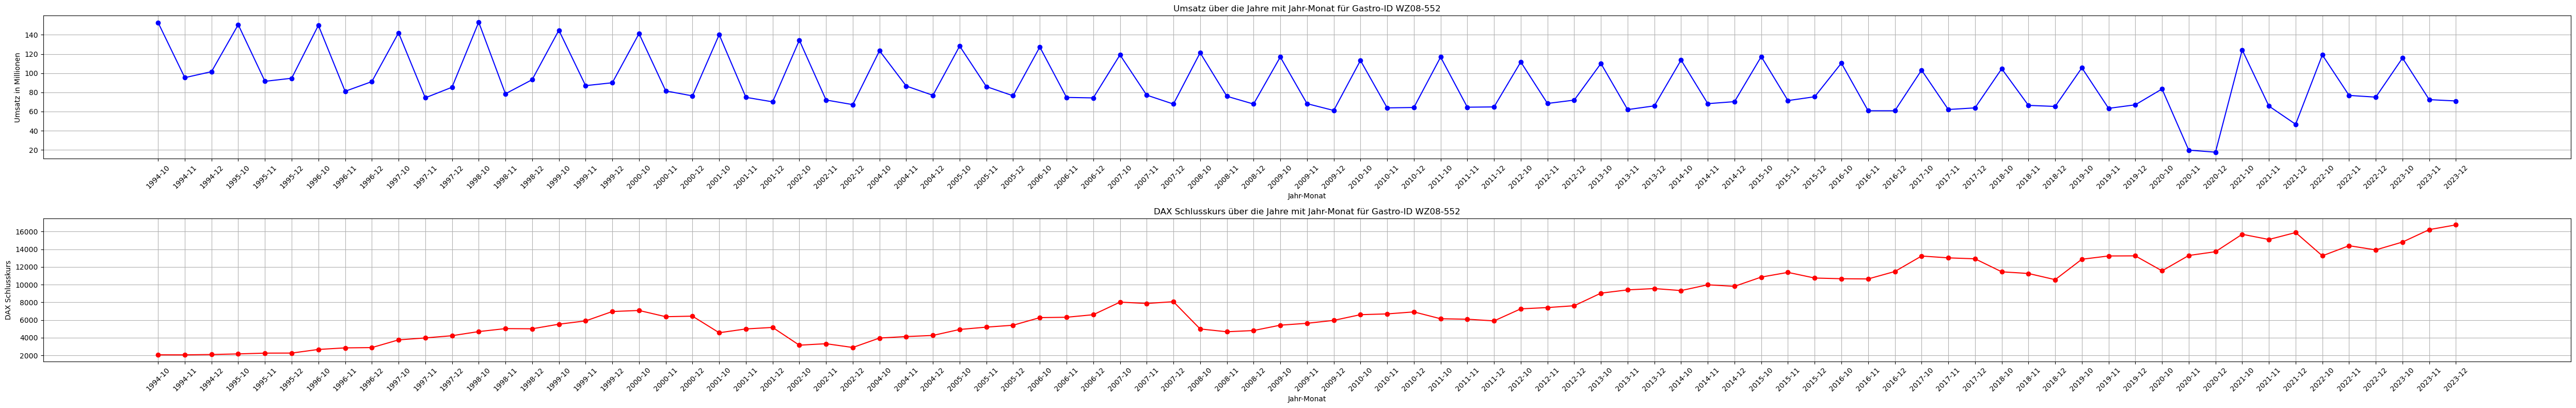

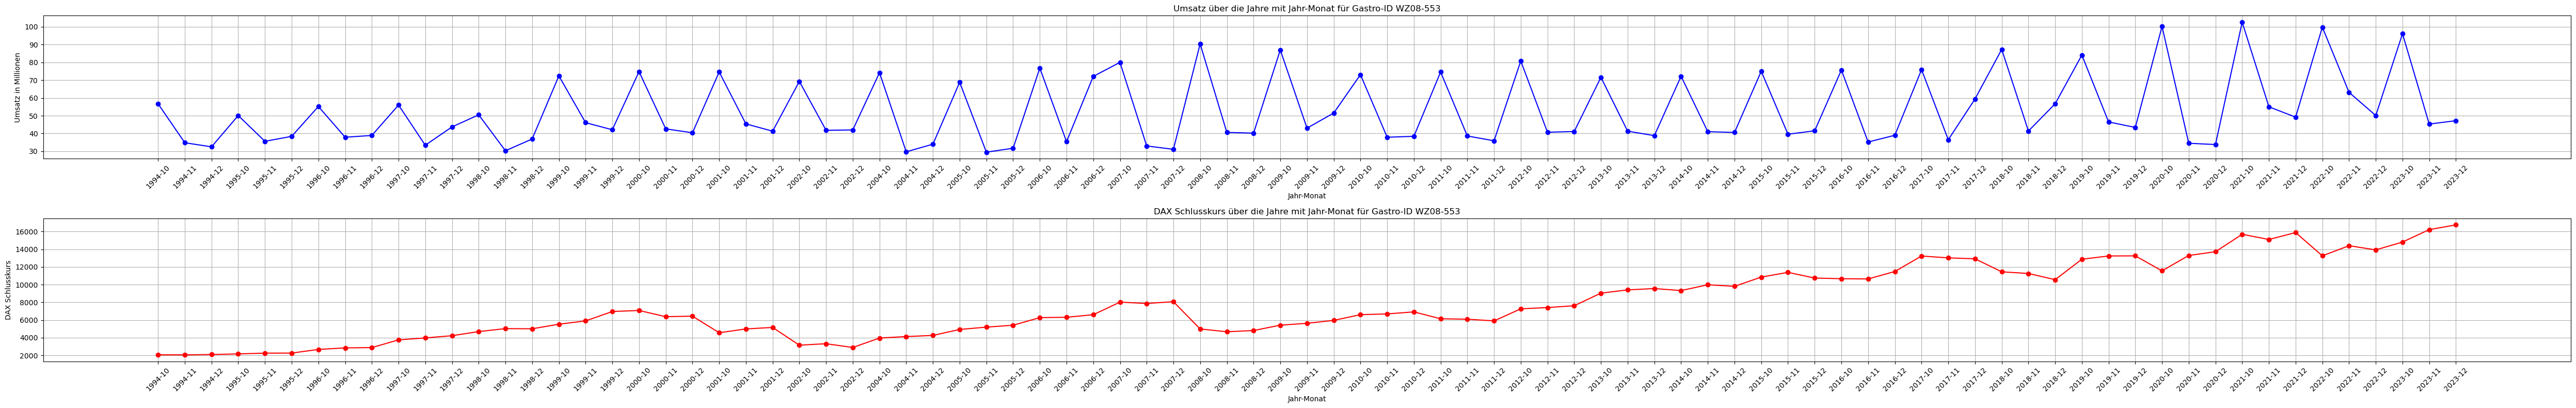

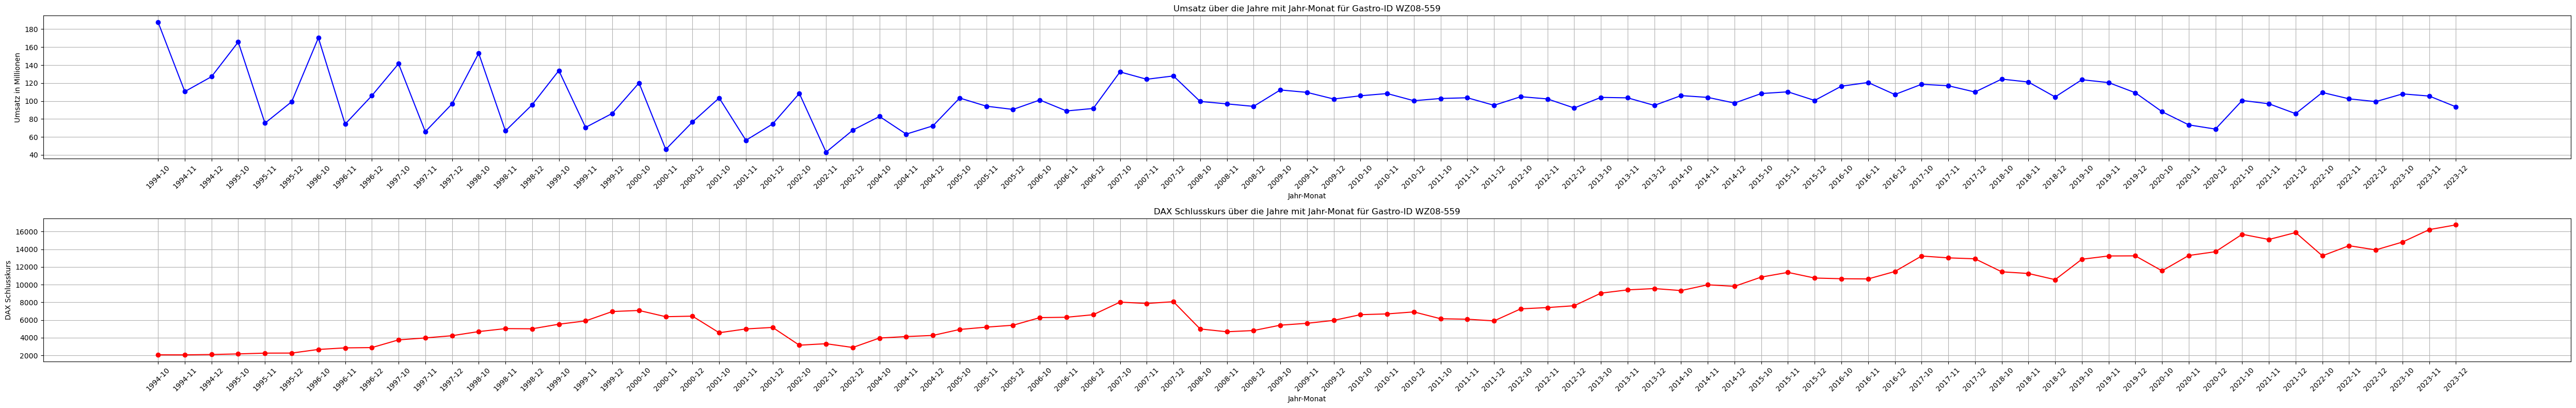

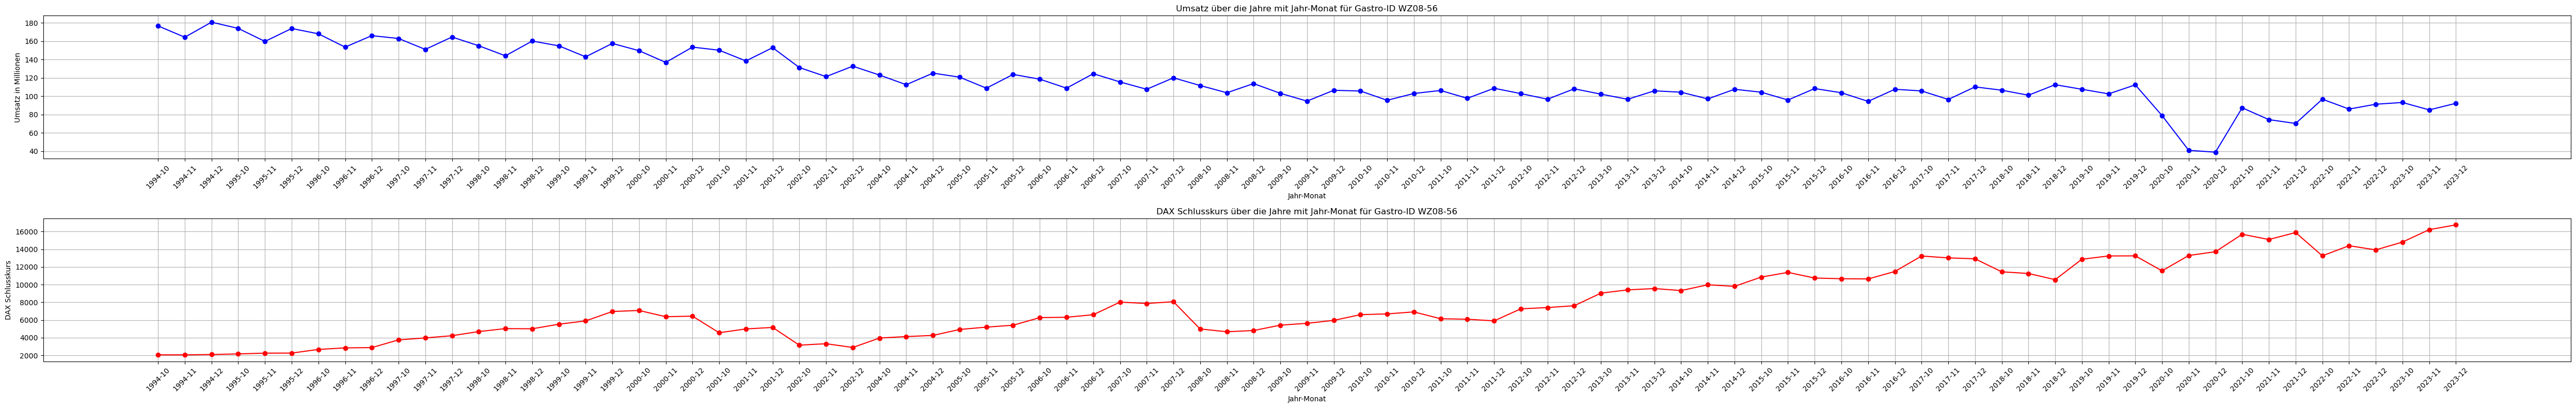

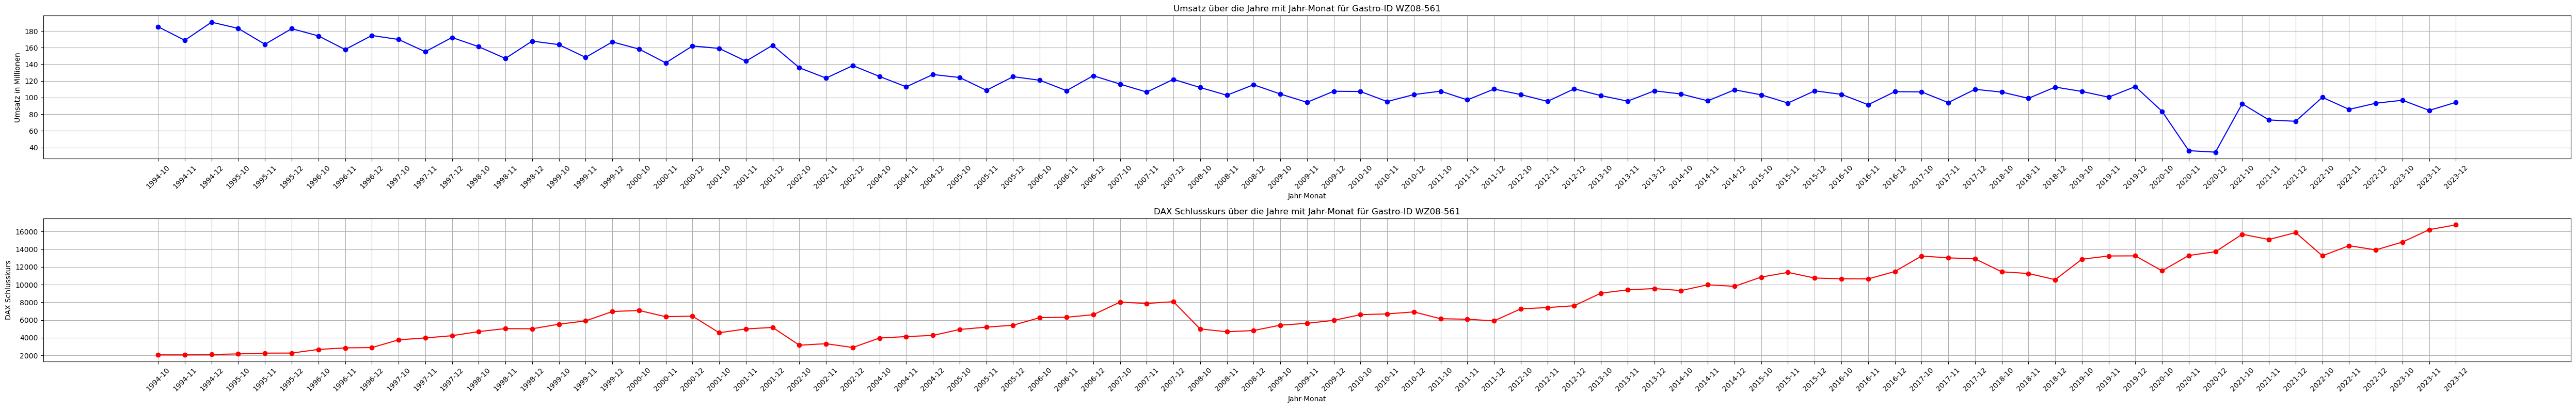

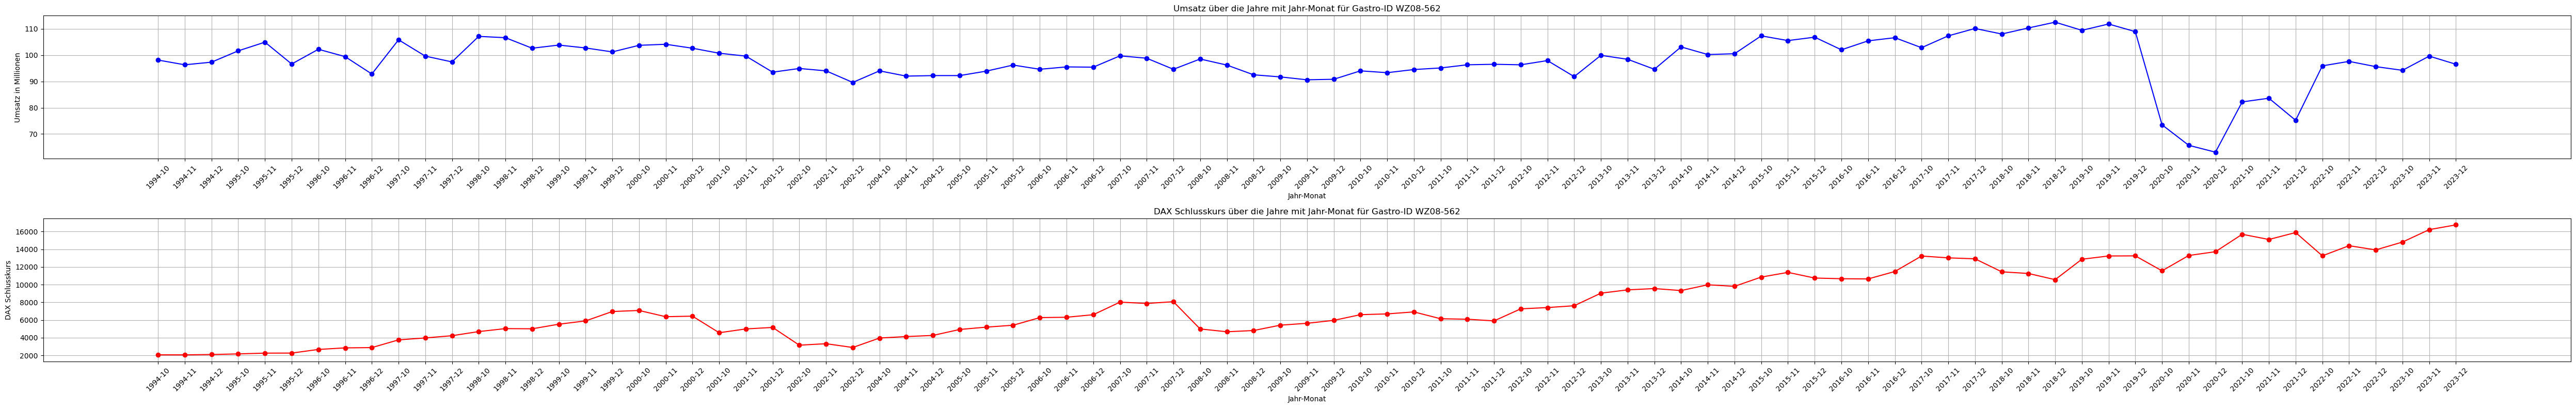

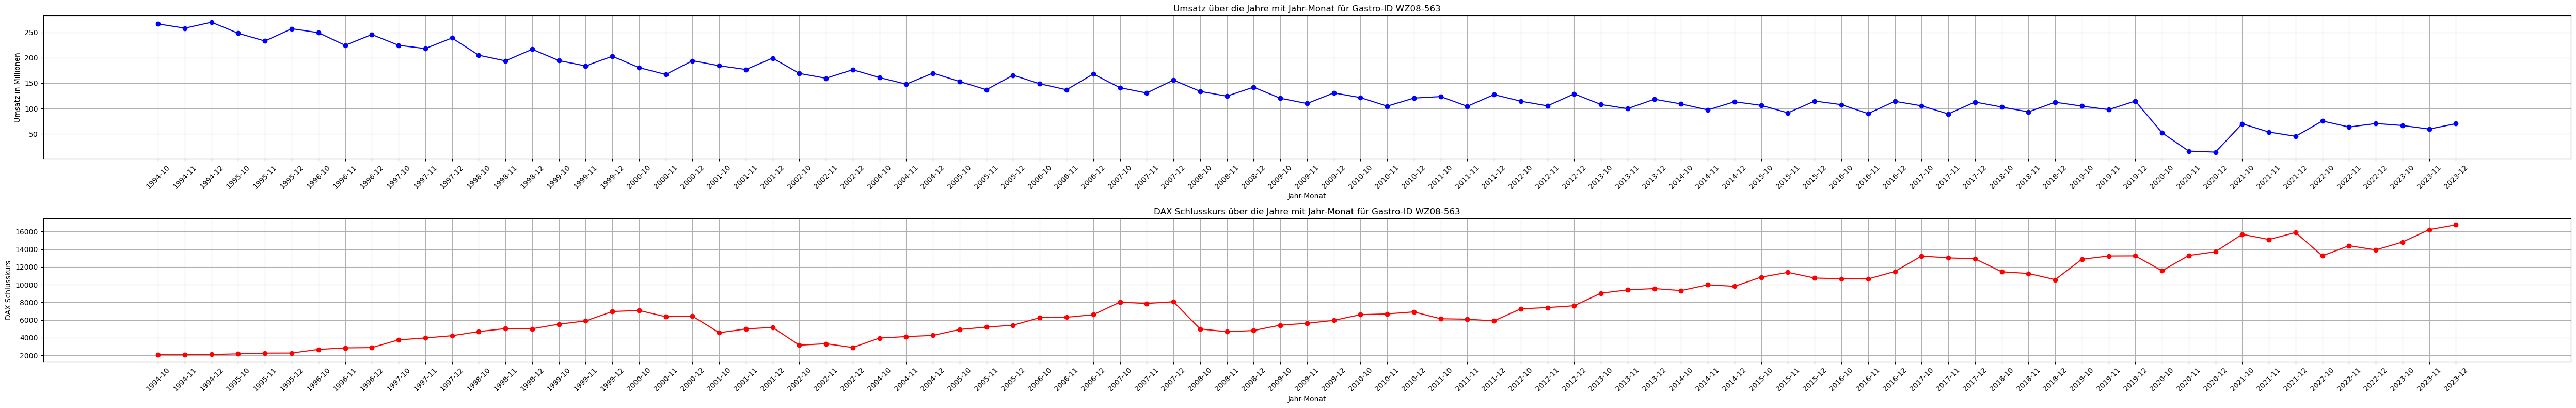

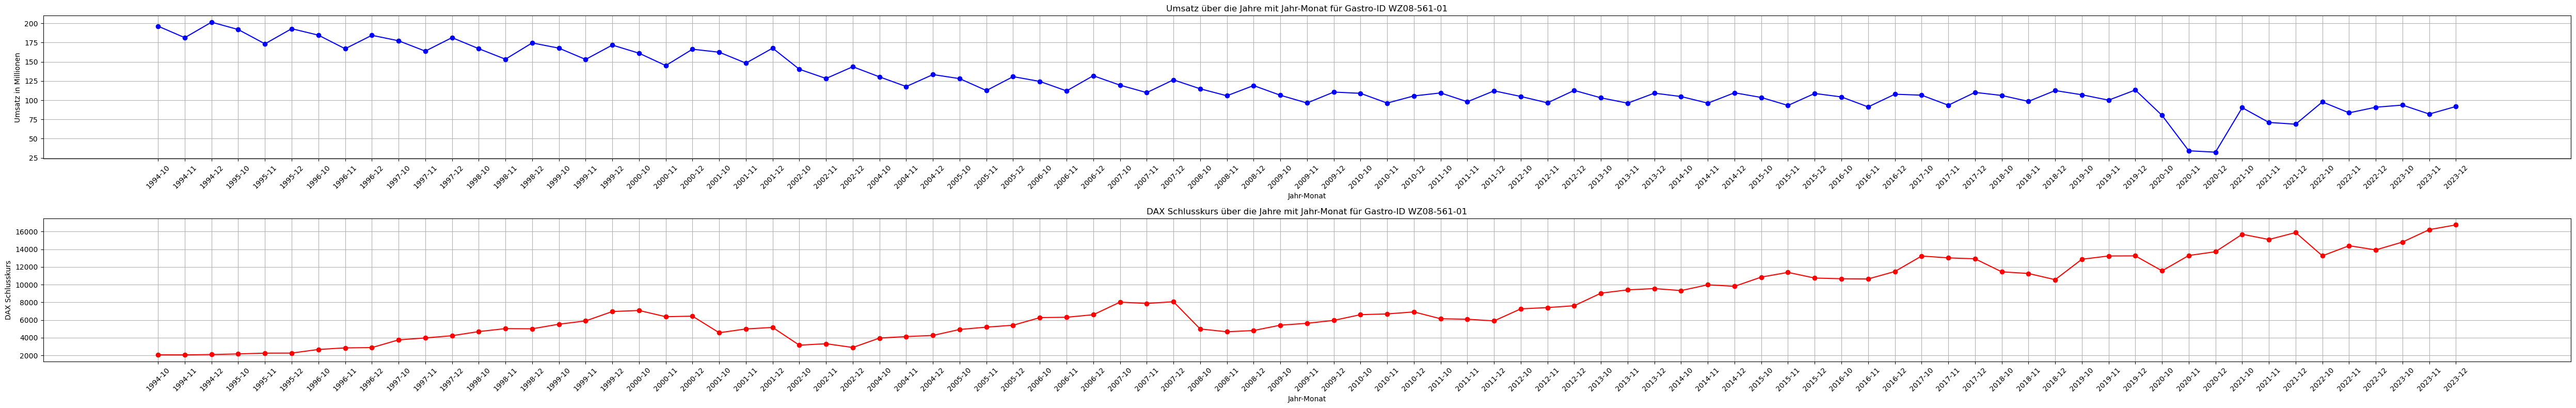

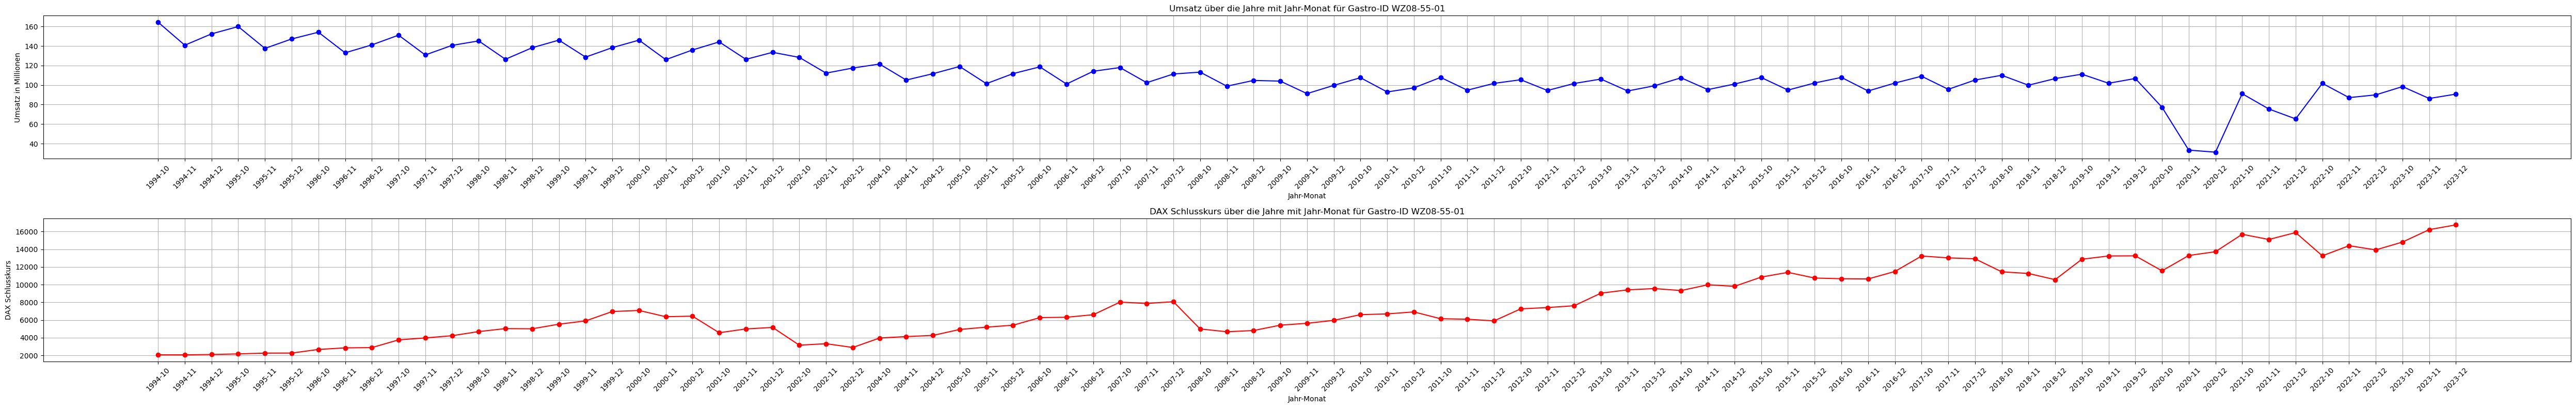

In [ ]:
unique_gastro_ids = merged_df_dax_gastro['Gastro_Id'].unique()

for gastro_id in unique_gastro_ids:
    selected_rows_gastro = merged_df_dax_gastro[merged_df_dax_gastro['Gastro_Id'] == gastro_id]
    
    plt.figure(figsize=(50, 8))  # Größe des Plots anpassen
    
    # Plot für den Umsatz
    plt.subplot(2, 1, 1)  # Erste von zwei Zeilen
    plt.plot(selected_rows_gastro['Jahr_Monat'], selected_rows_gastro['Umsatz in millionen'], marker='o', color='blue')
    plt.title(f'Umsatz über die Jahre mit Jahr-Monat für Gastro-ID {gastro_id}')
    plt.xlabel('Jahr-Monat')
    plt.ylabel('Umsatz in Millionen')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotation der x-Achsenbeschriftungen für bessere Lesbarkeit
    
    # Plot für den DAX Close-Wert
    plt.subplot(2, 1, 2)  # Zweite von zwei Zeilen
    plt.plot(selected_rows_gastro['Jahr_Monat'], selected_rows_gastro['Close'], marker='o', color='red')
    plt.title(f'DAX Schlusskurs über die Jahre mit Jahr-Monat für Gastro-ID {gastro_id}')
    plt.xlabel('Jahr-Monat')
    plt.ylabel('DAX Schlusskurs')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotation der x-Achsenbeschriftungen für bessere Lesbarkeit
    
    plt.tight_layout()  # Für einen verbesserten Layout-Abstand zwischen den Subplots
    
    plt.show()

Korrelation /mit Lag zwischen Dax und den Umsatz der Gastro

In [ ]:
correlation = merged_df_dax_gastro['Umsatz in millionen'].corr(merged_df_dax_gastro['Close'])

print("Korrelationskoeffizient zwischen Temperatur und Jahresumsatz:", correlation)

Korrelationskoeffizient zwischen Temperatur und Jahresumsatz: -0.40167225595969985


In [ ]:
# Prüfen auf einen Zusammenhang mit zeitlicher Verzögerung
lags = range(1, 13)  # Mögliche Verzögerungen von 1 bis 12 Monaten
correlation_with_lags = []
for lag in lags:
    # Verzögerte Durchschnittstemperatur um `lag` Monate
    merged_df_dax_gastro['Umsatz in millionen'] = merged_df_dax_gastro['Close'].shift(periods=lag)
    # Berechnen der Korrelation zwischen verzögerter Durchschnittstemperatur und Umsatz
    correlation_with_lags.append(merged_df_dax_gastro['Umsatz in millionen'].corr(merged_df_dax_gastro['Close']))

# Ermitteln des Lags mit der höchsten Korrelation
max_correlation_index = np.argmax(correlation_with_lags)
lag_with_max_correlation = lags[max_correlation_index]
max_correlation = correlation_with_lags[max_correlation_index]

print("Maximale Korrelation mit Lag von", lag_with_max_correlation, "Monaten:", max_correlation)

Maximale Korrelation mit Lag von 1 Monaten: 0.9978089899124958


Stakeholder und Konsumenten der Daten sind die Besitzer des Gastros. Dank der beiden Korrelationen, einmal mit dem Umsatz und der Temperatur und einmal mit dem Umsatz und des Daxes,
können sich die Gastros besser auf die Zukunft einstellen. Wenn der Dax hoch geht und es vor 2 Monaten hohe Temperaturen gab, können die Unternehmen mit einem erhöhten Umsatz rechnen.
Sie können einen größen Vorrat anhäufen wir den Monat oder mehr Werbung für ihr Unternehmen machen, um noch mehr Umsatz zu generieren.